<a href="https://colab.research.google.com/github/chernoskutov1989dv/chernoskutov1989dv-Toxic-phrases-detection-program-binary-classifier-with-improved-dataframe/blob/master/toxic_phrase_detection_dmitry_chernoskutov_labeled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import nltk

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import string
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize

In [ ]:
nltk.download ('punkt')
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score,recall_score, precision_recall_curve
from matplotlib import pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from sklearn.metrics import plot_precision_recall_curve
import numpy as np
from sklearn.model_selection import GridSearchCV

In [ ]:
df = pd.read_csv( "./labeled2.csv", sep = "," )

In [ ]:
df.shape

(14412, 2)

In [ ]:
df.head(6)

,comment,toxic
0,"Верблюдов-то за что? Дебилы, бл...\n",1.0
1,"Хохлы, это отдушина затюканого россиянина, мол...",1.0
2,Собаке - собачья смерть\n,1.0
3,"Страницу обнови, дебил. Это тоже не оскорблени...",1.0
4,"тебя не убедил 6-страничный пдф в том, что Скр...",1.0
5,Для каких стан является эталоном современная с...,1.0


In [ ]:
df ["toxic"] = df ["toxic"].apply (int)

In [ ]:
df.head(6)

,comment,toxic
0,"Верблюдов-то за что? Дебилы, бл...\n",1
1,"Хохлы, это отдушина затюканого россиянина, мол...",1
2,Собаке - собачья смерть\n,1
3,"Страницу обнови, дебил. Это тоже не оскорблени...",1
4,"тебя не убедил 6-страничный пдф в том, что Скр...",1
5,Для каких стан является эталоном современная с...,1


In [ ]:
df["toxic"].value_counts()

0    9606
1    4806
Name: toxic, dtype: int64

In [ ]:
for c in df[df["toxic"] == 1 ] ["comment"].head(10):
    print(c)

Верблюдов-то за что? Дебилы, бл...

Хохлы, это отдушина затюканого россиянина, мол, вон, а у хохлов еще хуже. Если бы хохлов не было, кисель их бы придумал.

Собаке - собачья смерть

Страницу обнови, дебил. Это тоже не оскорбление, а доказанный факт - не-дебил про себя во множественном числе писать не будет. Или мы в тебя верим - это ты и твои воображаемые друзья?

тебя не убедил 6-страничный пдф в том, что Скрипалей отравила Россия? Анализировать и думать пытаешься? Ватник что ли?)

Для каких стан является эталоном современная система здравоохранения РФ? Для Зимбабве? Ты тупой? хохлы

УПАД Т! ТАМ НЕЛЬЗЯ СТРОИТЬ! ТЕХНОЛОГИЙ НЕТ! РАЗВОРУЮТ КАК ВСЕГДА! УЖЕ ТРЕЩИНАМИ ПОШ Л! ТУПЫЕ КИТАЗЫ НЕ МОГУТ НИЧЕГО НОРМАЛЬНО СДЕЛАТЬ!

Ебать тебя разносит, шизик.

Обосрался, сиди обтекай

Зачем ты пишешь хуйню, дегенерат? Поцелуй в губы ! поцелую в засос.



In [ ]:
for c in df[df["toxic"] == 0 ] ["comment"].head(10):
    print(c)

В шапке были ссылки на инфу по текущему фильму марвел. Эти ссылки были заменены на фразу Репортим брипидора, игнорируем его посты. Если этого недостаточно, чтобы понять, что модератор абсолютный неадекват, и его нужно лишить полномочий, тогда эта борда пробивает абсолютное дно по неадекватности.

Почитайте посты у этого автора,может найдете что нибудь полезное. Надеюсь помог) https: pikabu.ru story obyichnyie budni dezsluzhbyi 4932098

Про графику было обидно) я так то проходил все серии гта со второй части по пятую, кроме гта 4. И мне не мешала графика ни в одной из частей. На компе у меня было куча видеокарт. Начиная с 32мб RIVA TNT и заканчивая 2Гб 560Ti на которой я спокойно играю который год в танки, гта5, ведьмака3 купил на распродаже и начал проходить. Да, не на ультрах. С пониженными текстурами. И не мешает. Я не понимаю дрочева на графике, требовать графику уровня плойки 4 минимум. Мне надо чтобы глаза не резало, только и всего. По поводу управления, мне не хватает переходника

In [ ]:
train_df, test_df = train_test_split (df, test_size = 500)

In [ ]:
test_df.shape

(500, 2)

In [ ]:
test_df ["toxic"].value_counts()

0    354
1    146
Name: toxic, dtype: int64

In [ ]:
train_df ["toxic"].value_counts()

0    9252
1    4660
Name: toxic, dtype: int64

In [ ]:
sentence_example = df.iloc[1]["comment"]

In [ ]:
tokens = word_tokenize (sentence_example, language = "russian" )

In [ ]:
tokens_without_punctuation = [i for i in tokens if i not in string.punctuation ] 

In [ ]:
russian_stop_words = stopwords.words ("russian")

In [ ]:
tokens_without_stop_words_and_punctuation = [i for i in tokens_without_punctuation if i not in russian_stop_words] 

In [ ]:
snowball = SnowballStemmer (language = "russian")

In [ ]:
stemmed_tokens = [snowball.stem(i) for i in tokens_without_stop_words_and_punctuation]

In [ ]:
print (f"Исходный текст: {sentence_example}")

Исходный текст: Хохлы, это отдушина затюканого россиянина, мол, вон, а у хохлов еще хуже. Если бы хохлов не было, кисель их бы придумал.



In [ ]:
print ("----------------")

----------------


In [ ]:
print (f"Токены: {tokens}")

Токены: ['Хохлы', ',', 'это', 'отдушина', 'затюканого', 'россиянина', ',', 'мол', ',', 'вон', ',', 'а', 'у', 'хохлов', 'еще', 'хуже', '.', 'Если', 'бы', 'хохлов', 'не', 'было', ',', 'кисель', 'их', 'бы', 'придумал', '.']


In [ ]:
print (f"Токены без пунктуации: {tokens_without_punctuation}")

Токены без пунктуации: ['Хохлы', 'это', 'отдушина', 'затюканого', 'россиянина', 'мол', 'вон', 'а', 'у', 'хохлов', 'еще', 'хуже', 'Если', 'бы', 'хохлов', 'не', 'было', 'кисель', 'их', 'бы', 'придумал']


In [ ]:
print ("----------------")

----------------


In [ ]:
print (f"Токены без пункуации и стоп слов: {tokens_without_stop_words_and_punctuation}")

Токены без пункуации и стоп слов: ['Хохлы', 'это', 'отдушина', 'затюканого', 'россиянина', 'мол', 'вон', 'хохлов', 'хуже', 'Если', 'хохлов', 'кисель', 'придумал']


In [ ]:
print ("----------------")

----------------


In [ ]:
print (f"Токены после стемминга: {stemmed_tokens }")

Токены после стемминга: ['хохл', 'эт', 'отдушин', 'затюкан', 'россиянин', 'мол', 'вон', 'хохл', 'хуж', 'есл', 'хохл', 'кисел', 'придума']


In [ ]:
print ("----------------")

----------------


In [ ]:
snowball = SnowballStemmer (language = "russian")
russian_stop_words = stopwords.words ("russian")

def tokenize_sentence (sentence: str, remove_stop_words: bool = True):
    tokens = word_tokenize (sentence, language = "russian")
    tokens = [i for i in tokens if i not in string.punctuation ]
    if remove_stop_words:
        tokens = [i for i in tokens if i not in russian_stop_words]
    tokens = [snowball.stem(i) for i in tokens ]
    return tokens

In [ ]:
tokenize_sentence(sentence_example)

['хохл',
 'эт',
 'отдушин',
 'затюкан',
 'россиянин',
 'мол',
 'вон',
 'хохл',
 'хуж',
 'есл',
 'хохл',
 'кисел',
 'придума']

In [ ]:
vectorizer = TfidfVectorizer(tokenizer = lambda x: tokenize_sentence (x, remove_stop_words = True))

In [ ]:
features = vectorizer.fit_transform (train_df ["comment"])

In [ ]:
model = LogisticRegression (random_state = 0)
model.fit (features, train_df["toxic"])

LogisticRegression(random_state=0)

In [ ]:
model.predict (features[7])

array([0])

In [ ]:
train_df ["comment"].iloc[7]

'Щас по книжкам мало кто учит. Я за неделю выучил JavaScript через приложение в телефоне. Половину, правда, забыл уже, так как практического применения нет. Чисто в библиотеку - пригодится.\n'

In [ ]:
model.predict (features[10])

array([0])

In [ ]:
train_df ["comment"].iloc[10]

'Вообще не пошлый, очень добрый и смешной семейный фильм, а в конце даже всплакнул. Трейлер хуже фильма и название фильму не совсем соответствует как по мне (тут думаю дело в локализации)\n'

На вход модели мы все таки должны подать текст, поэтому создаем Pipeline


In [ ]:
model_pipeline = Pipeline([
    ("vectorizer",  TfidfVectorizer( tokenizer = lambda x: tokenize_sentence(x, remove_stop_words = True))),
    ("model", LogisticRegression (random_state=0))
]
)

In [ ]:
model_pipeline.fit (train_df ["comment"], train_df ["toxic"])

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function <lambda> at 0x7f9b1483c050>)),
                ('model', LogisticRegression(random_state=0))])

In [ ]:
model_pipeline.predict (["Привет, у меня все отлично и здорово"])

array([0])

In [ ]:
model_pipeline.predict (["ты негодяй, тварь и скотина"])

array([1])

In [ ]:
model_pipeline.predict (["слушай, а не пойти ли тебе осюда"])

array([1])

In [ ]:
model_pipeline.predict (["слушай, а не пойти ли погулять"])

array([0])

In [ ]:
model_pipeline.predict (["погода на улице классная"])

array([0])

In [ ]:
model_pipeline.predict (["ты хочешь гулять? Не хочешь пойти на улицу?"])

array([0])

In [ ]:
precision_score (y_true = test_df ["toxic" ], y_pred = model_pipeline.predict (test_df ["comment"]))

0.9181818181818182

In [ ]:
recall_score (y_true = test_df["toxic"], y_pred = model_pipeline.predict (test_df ["comment"]))

0.6917808219178082

In [ ]:
from sklearn.metrics import plot_precision_recall_curve

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
prec, rec, thresholds = precision_recall_curve(y_true=test_df["toxic"], probas_pred=model_pipeline.predict_proba(test_df["comment"])[:, 1])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


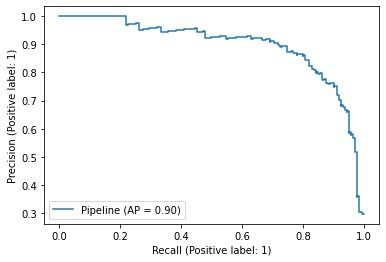

In [ ]:
plot_precision_recall_curve(estimator=model_pipeline, X=test_df["comment"], y=test_df["toxic"])

In [ ]:
np.where(prec > 0.95)

(array([420, 421, 422, 423, 424, 425, 426, 427, 428, 438, 439, 440, 441,
        442, 443, 444, 445, 446, 447, 448, 450, 451, 452, 453, 454, 455,
        456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468,
        469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481,
        482, 483, 484, 485, 486, 487, 488, 489]),)

In [ ]:
thresholds[420]

0.6282494968787452

In [ ]:
precision_score(y_true=test_df["toxic"], y_pred=model_pipeline.predict_proba(test_df["comment"])[:, 1] > thresholds[420])

0.9558823529411765

In [ ]:
recall_score(y_true=test_df["toxic"], y_pred=model_pipeline.predict_proba(test_df["comment"])[:, 1] > thresholds[420])

0.4452054794520548

In [ ]:
grid_pipeline = Pipeline([
    ("vectorizer", TfidfVectorizer(tokenizer=lambda x: tokenize_sentence(x, remove_stop_words=True))),
    ("model", 
     GridSearchCV(
        LogisticRegression(random_state=0),
        param_grid={'C': [0.1, 1, 10.]},
        cv=3,
         verbose=4
        )
    )
])


In [ ]:
grid_pipeline.fit(train_df["comment"], train_df["toxic"])

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3] END .............................C=0.1;, score=0.688 total time=   0.3s
[CV 2/3] END .............................C=0.1;, score=0.684 total time=   0.4s
[CV 3/3] END .............................C=0.1;, score=0.687 total time=   0.3s
[CV 1/3] END ...............................C=1;, score=0.830 total time=   0.6s
[CV 2/3] END ...............................C=1;, score=0.831 total time=   0.6s
[CV 3/3] END ...............................C=1;, score=0.835 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 1/3] END ............................C=10.0;, score=0.856 total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 2/3] END ............................C=10.0;, score=0.859 total time=   1.5s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 3/3] END ............................C=10.0;, score=0.862 total time=   1.5s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function <lambda> at 0x7f9b139f88c0>)),
                ('model',
                 GridSearchCV(cv=3,
                              estimator=LogisticRegression(random_state=0),
                              param_grid={'C': [0.1, 1, 10.0]}, verbose=4))])

In [ ]:
model_pipeline_c_10 = Pipeline([
    ("vectorizer", TfidfVectorizer(tokenizer=lambda x: tokenize_sentence(x, remove_stop_words=True))),
    ("model", LogisticRegression(random_state=0, C=10.))
]
)

In [ ]:
model_pipeline_c_10.fit(train_df["comment"], train_df["toxic"])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function <lambda> at 0x7f9b139255f0>)),
                ('model', LogisticRegression(C=10.0, random_state=0))])

In [ ]:
prec_c_10, rec_c_10, thresholds_c_10 = precision_recall_curve(y_true=test_df["toxic"], probas_pred=model_pipeline_c_10.predict_proba(test_df["comment"])[:, 1])

In [ ]:
np.where(prec_c_10 > 0.95)

(array([409, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422,
        423, 424, 425, 426, 427, 428, 429, 432, 433, 434, 435, 436, 437,
        438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 451,
        452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464,
        465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477,
        478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490]),)

In [ ]:
precision_score(y_true=test_df["toxic"], y_pred=model_pipeline_c_10.predict_proba(test_df["comment"])[:, 1] > thresholds_c_10[409])

0.95

In [ ]:
recall_score(y_true=test_df["toxic"], y_pred=model_pipeline_c_10.predict_proba(test_df["comment"])[:, 1] > thresholds_c_10[409])

0.5205479452054794